In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_app = pd.read_csv("https://www.dropbox.com/scl/fi/kw9qm7c4qo279tikkawzg/application_train.csv?rlkey=2ki8vh99q40hq46r553dclkrz&dl=1")
df_bureau = pd.read_csv("https://www.dropbox.com/scl/fi/ob456d4upjvxqtafje8jd/bureau.csv?rlkey=uw5f34sxmzrxje0blq01sxls1&dl=1")
df_prev = pd.read_csv("https://www.dropbox.com/scl/fi/3s22g0fpb51wf663d1idv/previous_application.csv?rlkey=frrtxo9r8focv1xa254irzjml&dl=1")

In [3]:
cols = ['SK_ID_CURR', 'TARGET', 'CODE_GENDER', 'CNT_CHILDREN',
        'NAME_EDUCATION_TYPE', 'NAME_HOUSING_TYPE', 'NAME_INCOME_TYPE',
        'ORGANIZATION_TYPE', 'AMT_REQ_CREDIT_BUREAU_MON',
        'AMT_REQ_CREDIT_BUREAU_YEAR']
filtered_df_app = df_app[cols].copy()

In [ ]:
fig,ax = plt.subplots(figsize=(7,7))
sns.scatterplot(x='WEEKDAY_APPR_PROCESS_START',y='HOUR_APPR_PROCESS_START',size='passenger',hue='passenger',data=df_app)
ax.set_xlabel('Day')
ax.set_xticks([1,2,3,4,5,6,7])
ax.set_xticklabels(['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'])
ax.set_yticks(range(24))
ax.set_ylabel('Hour')
ax.get_legend().set_title('Average Passengers when Traveling in Group')
ax.invert_yaxis()

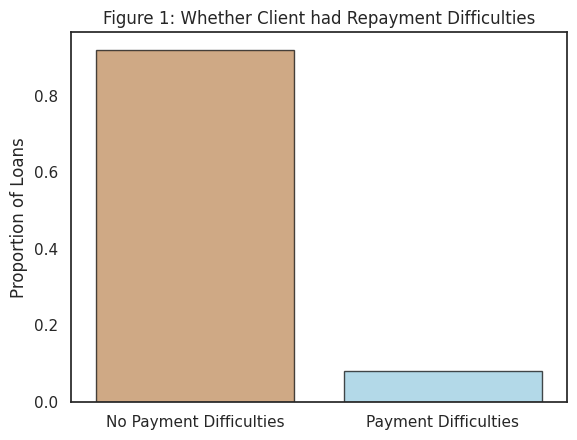

In [92]:
props = df_app['TARGET'].value_counts(normalize=True)

sns.set(style="white")
# plt.figure(figsize=(10, 6))
sns.barplot(x=["No Payment Difficulties", "Payment Difficulties"], alpha=.7, y=props, palette=['peru', 'skyblue'], edgecolor='black')
plt.ylabel("Proportion of Loans")
plt.title("Figure 1: Whether Client had Repayment Difficulties")
plt.show()

### Previous Loans (Probably Useful; separate into bins?)

In [4]:
filtered_df_app['CNT_PREV_HC'] = filtered_df_app['SK_ID_CURR'].map(df_prev['SK_ID_CURR'].value_counts()).fillna(0)
filtered_df_app['CNT_PREV_B'] = filtered_df_app['SK_ID_CURR'].map(df_bureau['SK_ID_CURR'].value_counts()).fillna(0)

In [5]:
filtered_df_app['CNT_PREV_HC_FLAG'] = filtered_df_app['CNT_PREV_HC'].map(lambda x: 0 if x == 0 else 1)
filtered_df_app['CNT_PREV_B_FLAG'] = filtered_df_app['CNT_PREV_B'].map(lambda x: 0 if x == 0 else 1)

In [6]:
filtered_df_app['CNT_PREV_TOTAL'] = filtered_df_app['CNT_PREV_HC'] + filtered_df_app['CNT_PREV_B']
filtered_df_app['CNT_PREV_TOTAL_FLAG'] = filtered_df_app['CNT_PREV_TOTAL'].map(lambda x: 0 if x == 0 else 1)

In [7]:
filtered_df_app['CNT_PREV_HC'].value_counts()

1.0     52533
2.0     45799
3.0     40014
4.0     32922
5.0     26638
        ...  
63.0        1
51.0        1
72.0        1
45.0        1
53.0        1
Name: CNT_PREV_HC, Length: 66, dtype: int64

In [8]:
filtered_df_app['CNT_PREV_HC_FLAG'].value_counts()

1    291057
0     16454
Name: CNT_PREV_HC_FLAG, dtype: int64

In [9]:
filtered_df_app['CNT_PREV_B'].value_counts()

0.0      44020
1.0      36072
2.0      35635
3.0      32925
4.0      28973
         ...  
61.0         1
58.0         1
53.0         1
116.0        1
59.0         1
Name: CNT_PREV_B, Length: 61, dtype: int64

In [10]:
filtered_df_app['CNT_PREV_B_FLAG'].value_counts()

1    263491
0     44020
Name: CNT_PREV_B_FLAG, dtype: int64

In [11]:
filtered_df_app['CNT_PREV_TOTAL'].value_counts()

5.0      23166
6.0      22923
4.0      22817
7.0      22053
8.0      20941
         ...  
122.0        1
73.0         1
87.0         1
102.0        1
72.0         1
Name: CNT_PREV_TOTAL, Length: 84, dtype: int64

In [12]:
filtered_df_app['CNT_PREV_TOTAL_FLAG'].value_counts()

1    305041
0      2470
Name: CNT_PREV_TOTAL_FLAG, dtype: int64

<Axes: xlabel='CNT_PREV_HC'>

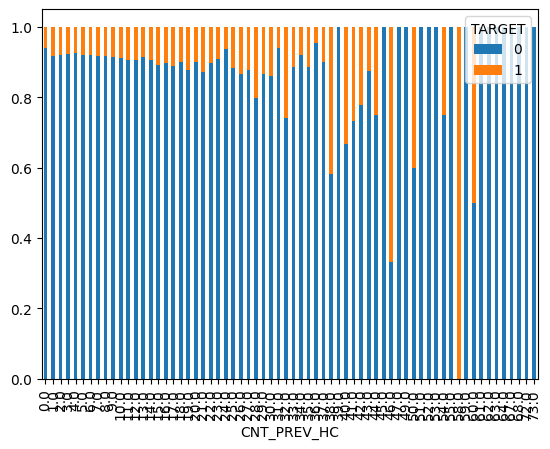

In [13]:
filtered_df_app.groupby('CNT_PREV_HC')['TARGET'].value_counts(normalize=True).unstack().fillna(0).plot.bar(stacked=True)

<Axes: xlabel='CNT_PREV_HC_FLAG'>

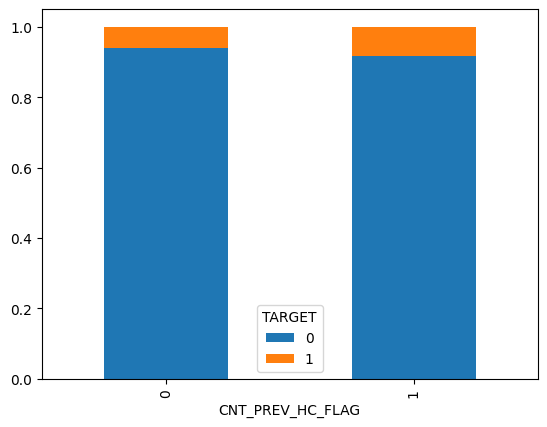

In [14]:
filtered_df_app.groupby('CNT_PREV_HC_FLAG')['TARGET'].value_counts(normalize=True).unstack().fillna(0).plot.bar(stacked=True)

<Axes: xlabel='CNT_PREV_B'>

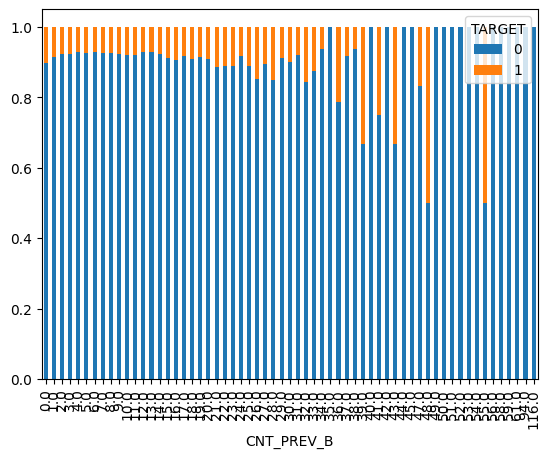

In [15]:
filtered_df_app.groupby('CNT_PREV_B')['TARGET'].value_counts(normalize=True).unstack().fillna(0).plot.bar(stacked=True)

<Axes: xlabel='CNT_PREV_B_FLAG'>

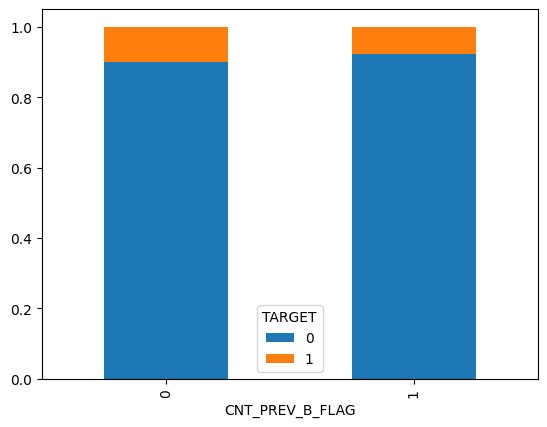

In [16]:
filtered_df_app.groupby('CNT_PREV_B_FLAG')['TARGET'].value_counts(normalize=True).unstack().fillna(0).plot.bar(stacked=True)

<Axes: xlabel='CNT_PREV_TOTAL'>

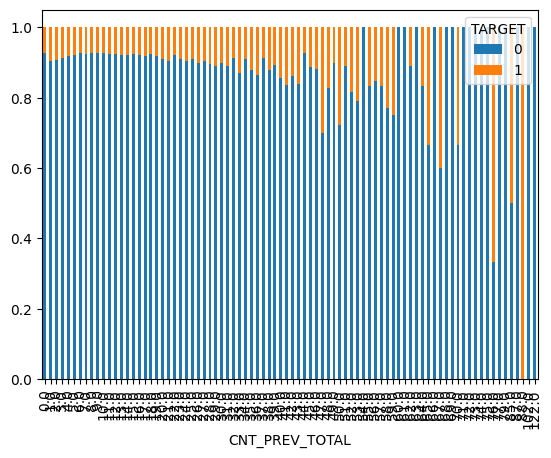

In [17]:
filtered_df_app.groupby('CNT_PREV_TOTAL')['TARGET'].value_counts(normalize=True).unstack().fillna(0).plot.bar(stacked=True)

<Axes: xlabel='CNT_PREV_TOTAL_FLAG'>

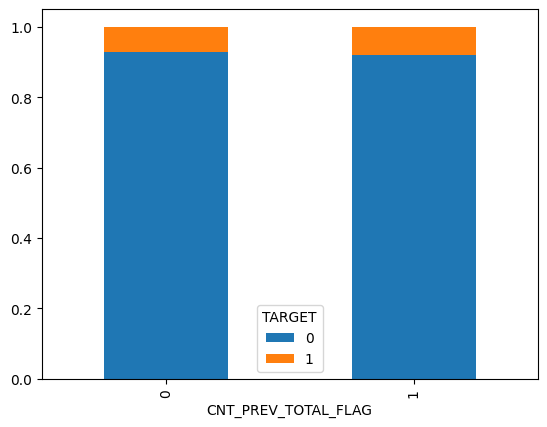

In [18]:
filtered_df_app.groupby('CNT_PREV_TOTAL_FLAG')['TARGET'].value_counts(normalize=True).unstack().fillna(0).plot.bar(stacked=True)

### Income Type (Probably Useful)

In [19]:
def map_income(x):
  if x not in ['Working', 'Commercial associate', 'Pensioner', 'State servant', 'Unemployed']:
    return 'Other'
  return x

In [20]:
filtered_df_app['NAME_INCOME_TYPE_CAT'] = filtered_df_app['NAME_INCOME_TYPE'].map(map_income)

In [21]:
filtered_df_app['NAME_INCOME_TYPE'].value_counts()

Working                 158774
Commercial associate     71617
Pensioner                55362
State servant            21703
Unemployed                  22
Student                     18
Businessman                 10
Maternity leave              5
Name: NAME_INCOME_TYPE, dtype: int64

In [22]:
filtered_df_app['NAME_INCOME_TYPE_CAT'].value_counts()

Working                 158774
Commercial associate     71617
Pensioner                55362
State servant            21703
Other                       33
Unemployed                  22
Name: NAME_INCOME_TYPE_CAT, dtype: int64

<Axes: xlabel='NAME_INCOME_TYPE'>

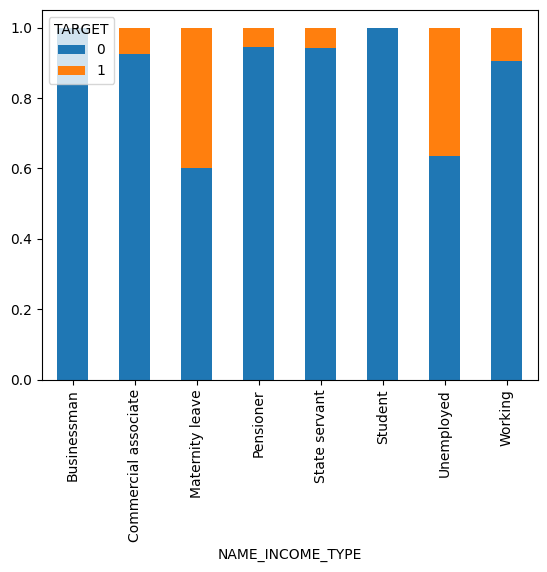

In [23]:
filtered_df_app.groupby('NAME_INCOME_TYPE')['TARGET'].value_counts(normalize=True).unstack().fillna(0).plot.bar(stacked=True)

<Axes: xlabel='NAME_INCOME_TYPE_CAT'>

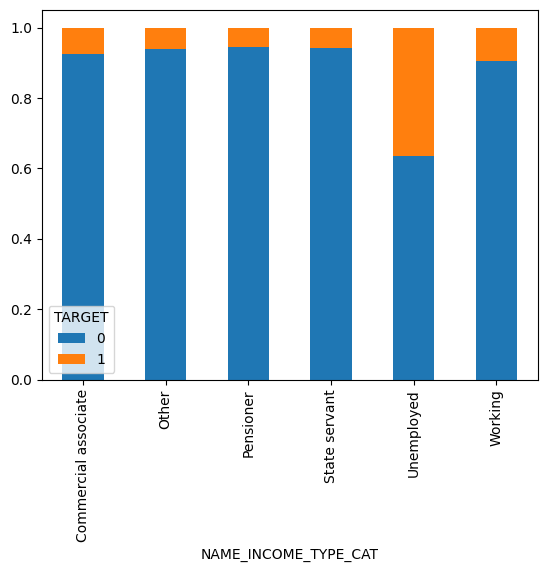

In [24]:
filtered_df_app.groupby('NAME_INCOME_TYPE_CAT')['TARGET'].value_counts(normalize=True).unstack().fillna(0).plot.bar(stacked=True)

### Gender (Possibly Useful)

In [25]:
filtered_df_app['CODE_GENDER'].value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

<Axes: xlabel='CODE_GENDER'>

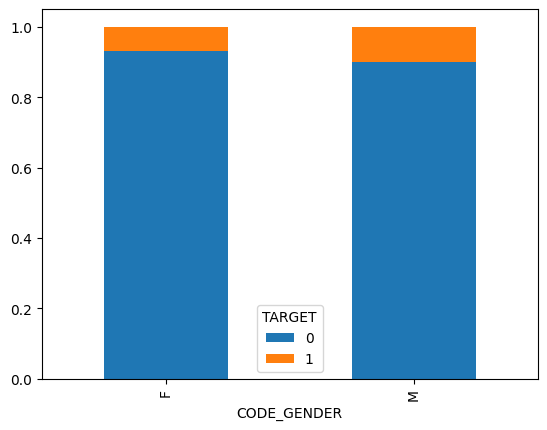

In [26]:
filtered_df_app[filtered_df_app['CODE_GENDER'] != 'XNA'].groupby('CODE_GENDER')['TARGET'].value_counts(normalize=True).unstack().plot.bar(stacked=True)

### Housing Type (Possibly Useful)

In [27]:
filtered_df_app['HOUSING_PARENT_FLAG'] = filtered_df_app['NAME_HOUSING_TYPE'].map(lambda x: 1 if 'parents' in x else 0)

In [28]:
filtered_df_app['NAME_HOUSING_TYPE'].value_counts()

House / apartment      272868
With parents            14840
Municipal apartment     11183
Rented apartment         4881
Office apartment         2617
Co-op apartment          1122
Name: NAME_HOUSING_TYPE, dtype: int64

In [29]:
filtered_df_app['HOUSING_PARENT_FLAG'].value_counts()

0    292671
1     14840
Name: HOUSING_PARENT_FLAG, dtype: int64

<Axes: xlabel='NAME_HOUSING_TYPE'>

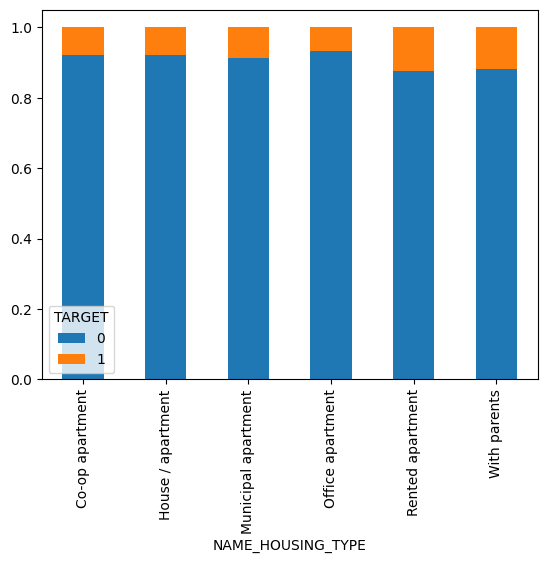

In [30]:
filtered_df_app.groupby('NAME_HOUSING_TYPE')['TARGET'].value_counts(normalize=True).unstack().fillna(0).plot.bar(stacked=True)

<Axes: xlabel='HOUSING_PARENT_FLAG'>

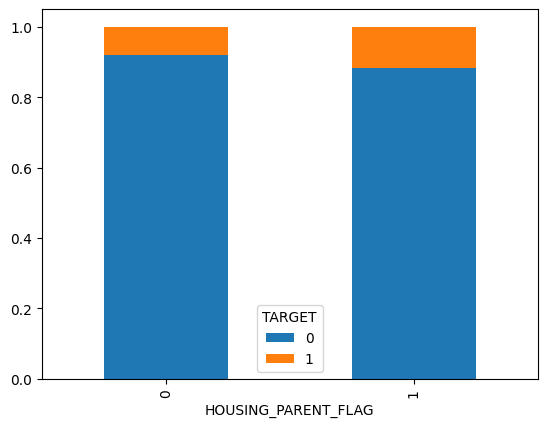

In [31]:
filtered_df_app.groupby('HOUSING_PARENT_FLAG')['TARGET'].value_counts(normalize=True).unstack().fillna(0).plot.bar(stacked=True)

### Education (Possibly Useful)

In [33]:
# filtered_df_app['NAME_EDUCATION_TYPE'] = filtered_df_app['NAME_EDUCATION_TYPE'].map(lamdba x: )

In [34]:
filtered_df_app['NAME_EDUCATION_TYPE'].value_counts()

Secondary / secondary special    218391
Higher education                  74863
Incomplete higher                 10277
Lower secondary                    3816
Academic degree                     164
Name: NAME_EDUCATION_TYPE, dtype: int64

<Axes: xlabel='NAME_EDUCATION_TYPE'>

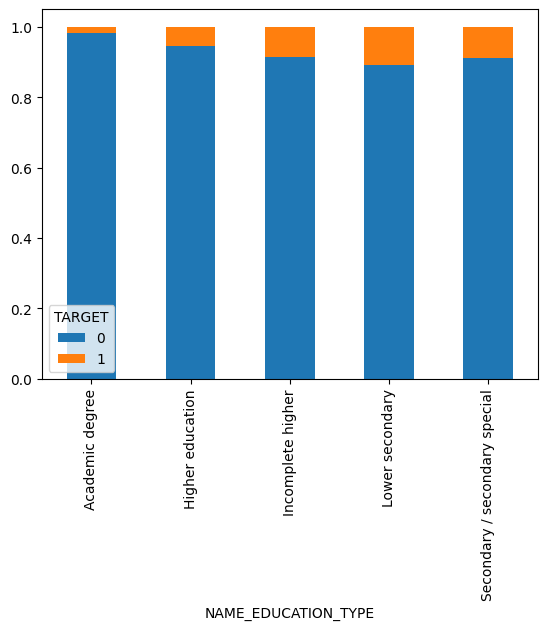

In [35]:
filtered_df_app.groupby('NAME_EDUCATION_TYPE')['TARGET'].value_counts(normalize=True).unstack().fillna(0).plot.bar(stacked=True)

### Children (Not Useful)

In [36]:
filtered_df_app['CHILDREN_FLAG'] = filtered_df_app['CNT_CHILDREN'].map(lambda x: 0 if x == 0 else 1)

In [37]:
filtered_df_app['CNT_CHILDREN'].value_counts()

0     215371
1      61119
2      26749
3       3717
4        429
5         84
6         21
7          7
14         3
8          2
9          2
12         2
10         2
19         2
11         1
Name: CNT_CHILDREN, dtype: int64

In [38]:
filtered_df_app['CHILDREN_FLAG'].value_counts()

0    215371
1     92140
Name: CHILDREN_FLAG, dtype: int64

<Axes: xlabel='CNT_CHILDREN'>

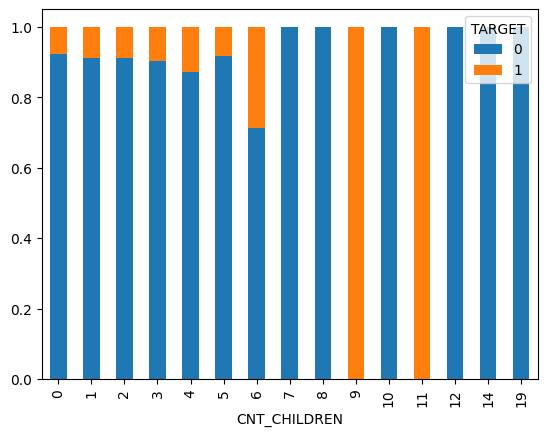

In [39]:
filtered_df_app.groupby('CNT_CHILDREN')['TARGET'].value_counts(normalize=True).unstack().fillna(0).plot.bar(stacked=True)

<Axes: xlabel='CHILDREN_FLAG'>

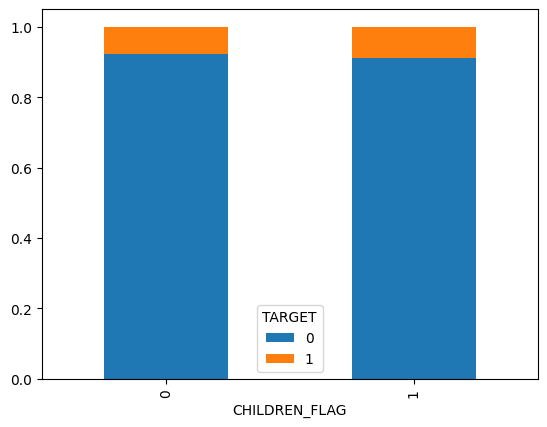

In [40]:
filtered_df_app.groupby('CHILDREN_FLAG')['TARGET'].value_counts(normalize=True).unstack().fillna(0).plot.bar(stacked=True)

### Organization Type (Possibly Useful)

In [41]:
filtered_df_app['ORGANIZATION_TYPE'].value_counts()

Business Entity Type 3    67992
XNA                       55374
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7           1307
Transpor

In [42]:
filtered_df_app['ORGANIZATION_TYPE_CAT'] = filtered_df_app['ORGANIZATION_TYPE'].str.split(':').str[0].str.split('Type').str[0].str.strip()

In [43]:
filtered_df_app['ORGANIZATION_TYPE_CAT'].value_counts()

Business Entity        84529
XNA                    55374
Self-employed          38412
Other                  16683
Trade                  14315
Industry               14311
Medicine               11193
Government             10404
Transport               8990
School                  8893
Kindergarten            6880
Construction            6721
Security                3247
Housing                 2958
Military                2634
Bank                    2507
Agriculture             2454
Police                  2341
Postal                  2157
Security Ministries     1974
Restaurant              1811
Services                1575
University              1327
Hotel                    966
Electricity              950
Insurance                597
Telecom                  577
Emergency                560
Advertising              429
Realtor                  396
Culture                  379
Mobile                   317
Legal Services           305
Cleaning                 260
Religion      

<Axes: xlabel='ORGANIZATION_TYPE_CAT'>

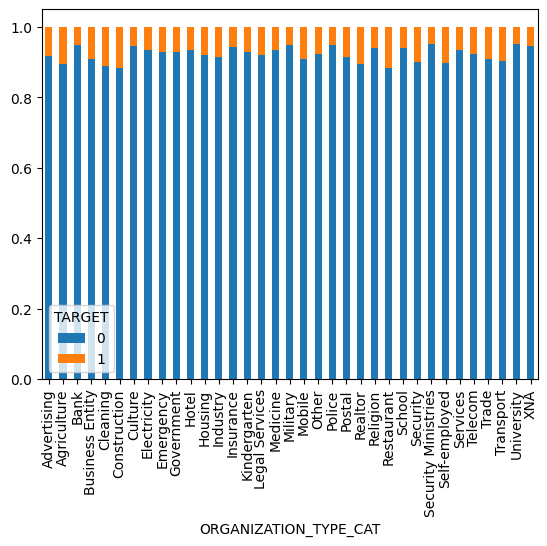

In [44]:
filtered_df_app.groupby('ORGANIZATION_TYPE_CAT')['TARGET'].value_counts(normalize=True).unstack().fillna(0).plot.bar(stacked=True)

### Credit Request (Not Useful)

#### 1 Month

In [45]:
filtered_df_app['AMT_REQ_CREDIT_BUREAU_MON_FLAG'] = filtered_df_app['AMT_REQ_CREDIT_BUREAU_MON'].map(lambda x: 0 if x == 0 else 1)

In [46]:
filtered_df_app['AMT_REQ_CREDIT_BUREAU_MON'].value_counts()

0.0     222233
1.0      33147
2.0       5386
3.0       1991
4.0       1076
5.0        602
6.0        343
7.0        298
9.0        206
8.0        185
10.0       132
11.0       119
12.0        77
13.0        72
14.0        40
15.0        35
16.0        23
17.0        14
18.0         6
19.0         3
24.0         1
23.0         1
27.0         1
22.0         1
Name: AMT_REQ_CREDIT_BUREAU_MON, dtype: int64

In [47]:
filtered_df_app['AMT_REQ_CREDIT_BUREAU_MON_FLAG'].value_counts()

0    222233
1     85278
Name: AMT_REQ_CREDIT_BUREAU_MON_FLAG, dtype: int64

<Axes: xlabel='AMT_REQ_CREDIT_BUREAU_MON'>

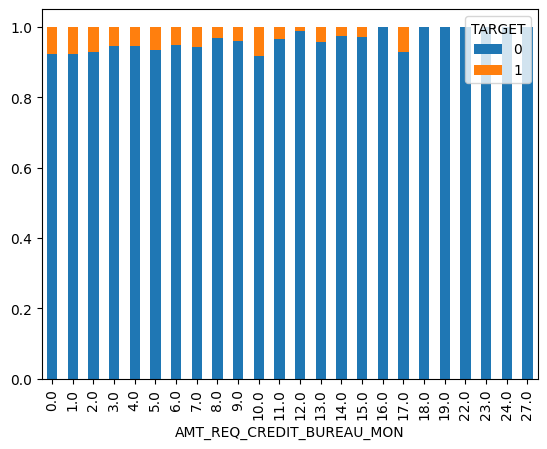

In [48]:
filtered_df_app.groupby('AMT_REQ_CREDIT_BUREAU_MON')['TARGET'].value_counts(normalize=True).unstack().fillna(0).plot.bar(stacked=True)

<Axes: xlabel='AMT_REQ_CREDIT_BUREAU_MON_FLAG'>

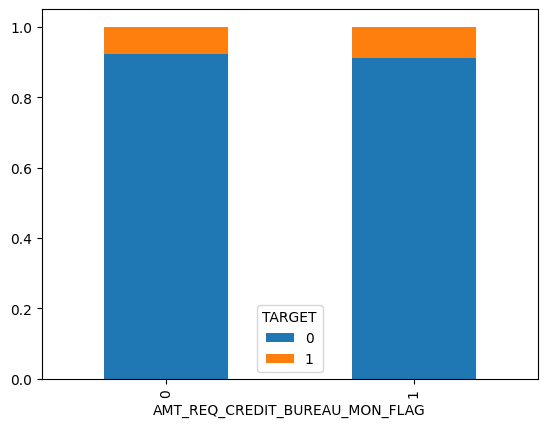

In [49]:
filtered_df_app.groupby('AMT_REQ_CREDIT_BUREAU_MON_FLAG')['TARGET'].value_counts(normalize=True).unstack().fillna(0).plot.bar(stacked=True)

#### 1 Year

In [50]:
filtered_df_app['AMT_REQ_CREDIT_BUREAU_YEAR_FLAG'] = filtered_df_app['AMT_REQ_CREDIT_BUREAU_YEAR'].map(lambda x: 0 if x < 2 else 1)

In [51]:
filtered_df_app['AMT_REQ_CREDIT_BUREAU_YEAR'].value_counts()

0.0     71801
1.0     63405
2.0     50192
3.0     33628
4.0     20714
5.0     12052
6.0      6967
7.0      3869
8.0      2127
9.0      1096
11.0       31
12.0       30
10.0       22
13.0       19
14.0       10
17.0        7
15.0        6
19.0        4
18.0        4
16.0        3
25.0        1
23.0        1
22.0        1
21.0        1
20.0        1
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: int64

In [52]:
filtered_df_app['AMT_REQ_CREDIT_BUREAU_YEAR_FLAG'].value_counts()

1    172305
0    135206
Name: AMT_REQ_CREDIT_BUREAU_YEAR_FLAG, dtype: int64

<Axes: xlabel='AMT_REQ_CREDIT_BUREAU_YEAR'>

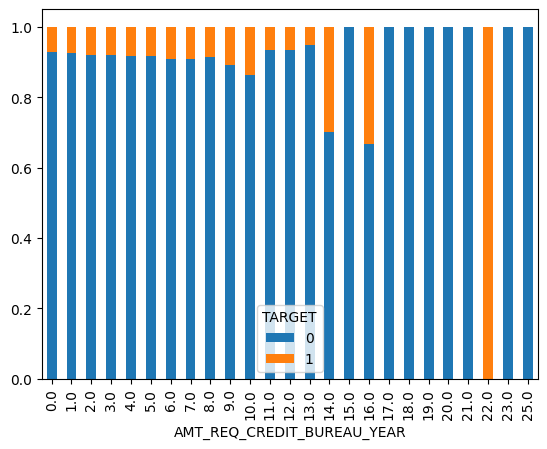

In [53]:
filtered_df_app.groupby('AMT_REQ_CREDIT_BUREAU_YEAR')['TARGET'].value_counts(normalize=True).unstack().fillna(0).plot.bar(stacked=True)

<Axes: xlabel='AMT_REQ_CREDIT_BUREAU_YEAR_FLAG'>

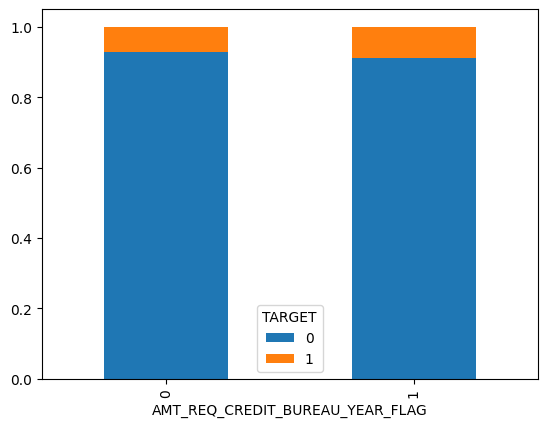

In [54]:
filtered_df_app.groupby('AMT_REQ_CREDIT_BUREAU_YEAR_FLAG')['TARGET'].value_counts(normalize=True).unstack().fillna(0).plot.bar(stacked=True)